<h4>Import the Libraries</h4>

In [2]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline              import Pipeline
from sklearn                       import svm
from sklearn.decomposition         import PCA
from sklearn.preprocessing         import StandardScaler, LabelBinarizer
from sklearn.datasets              import load_iris
from sklearn.model_selection       import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics               import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from sklearn.linear_model          import LogisticRegression

<h5>Some housekeeping params</h5>

In [4]:
# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 7),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1,
          'scatter.edgecolors': 'b' # edge color of markers
         }

CMAP = plt.cm.brg
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.2

<Figure size 1500x700 with 0 Axes>

In [5]:
X, y =load_iris(return_X_y = True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                    #stratify= y,
                                                  test_size = TEST_SIZE,
                                                 random_state= RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [7]:
clf = svm.SVC(kernel='linear', C= 1)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.9666666666666667

<h4>Cross Validation</h4>

In [9]:
clf = svm.SVC(kernel='linear', C= 1)
scores = cross_val_score(clf, X_train,y_train,cv= 5, scoring='f1_macro')

scores.mean(), scores.std()

(0.9746309967981794, 0.02071961117496963)

<h4>Grid Search</h4>

In [11]:
param = {'kernel':('linear','rbf'), 'C':[1,100]}

svc=svm.SVC()

clf = GridSearchCV(svc,param)

In [12]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 100], 'kernel': ('linear', 'rbf')})

In [13]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [14]:
clf.cv_results_

{'mean_fit_time': array([0.00039992, 0.00080013, 0.0006    , 0.00060015]),
 'std_fit_time': array([0.0004898 , 0.00040007, 0.0004899 , 0.00049002]),
 'mean_score_time': array([0.00059958, 0.00019989, 0.00039973, 0.00039997]),
 'std_score_time': array([0.00048955, 0.00039978, 0.00048957, 0.00048986]),
 'param_C': masked_array(data=[1, 1, 100, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 100, 'kernel': 'linear'},
  {'C': 100, 'kernel': 'rbf'}],
 'split0_test_score': array([1.        , 0.95833333, 0.91666667, 0.95833333]),
 'split1_test_score': array([1., 1., 1., 1.]),
 'split2_test_score': array([0.95833333, 0.875     , 0.91666667, 0.875     ]),
 'split3_test_score': array([0.9583

In [15]:
clf.best_estimator_

SVC(C=1, kernel='linear')

In [16]:
clf.best_score_

0.975

In [17]:
clf.best_estimator_.predict(X_test)

array([2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 0, 2])

<h4>Random Search</h4>

In [19]:
param = {'kernel':('linear', 'rbf', 'sigmoid'), 'C': [1, 2, 5, 8, 10, 20, 50, 100],  'gamma':[0.001, 0.01, 0.1,  1, 10, 100, 1000]}

svc = svm.SVC()

clf = RandomizedSearchCV(svc,param)

clf.fit(X_train,y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [1, 2, 5, 8, 10, 20, 50, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10, 100,
                                                  1000],
                                        'kernel': ('linear', 'rbf', 'sigmoid')})

In [20]:
clf.best_params_

{'kernel': 'linear', 'gamma': 10, 'C': 5}

<h4>Pipelines</h4>

In [22]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', svm.SVC())])
pipe.fit(X_train,y_train)

pipe.score(X_test,y_test)

1.0

In [23]:
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9666666666666667

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  3,  1],
       [ 0,  0, 16]], dtype=int64)

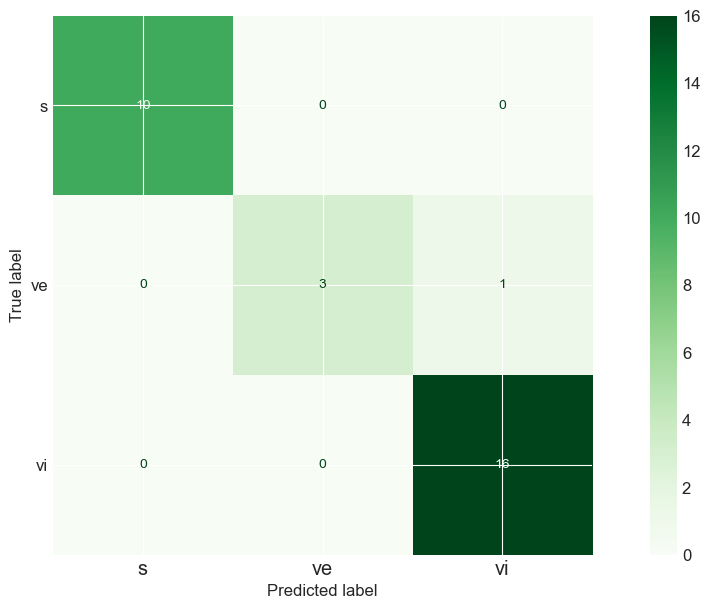

In [25]:
class_names = ['s', 've', 'vi']

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)

disp.plot(cmap=plt.cm.Greens)

In [26]:
random_state=np.random.RandomState(RANDOM_STATE)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))

X = np.concatenate([X, random_state.randn(n_samples, 200* n_features)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=TEST_SIZE, 
                                                    stratify=y, 
                                                    random_state=RANDOM_STATE)

In [27]:
X.shape

(150, 804)

In [28]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)
y_score[:5]

array([[0.00613418, 0.81519166, 0.17867416],
       [0.14310514, 0.67252842, 0.18436644],
       [0.70754869, 0.21783857, 0.07461273],
       [0.53397886, 0.42653661, 0.03948453],
       [0.00943974, 0.34401021, 0.64655006]])

In [29]:
label_binarizer = LabelBinarizer().fit(y_train)
y_oh_test = label_binarizer.transform(y_test)

y_test.shape,y_oh_test.shape

((30,), (30, 3))

In [30]:
class_of_interest = 2

class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

Text(0, 0.5, 'True Positive')

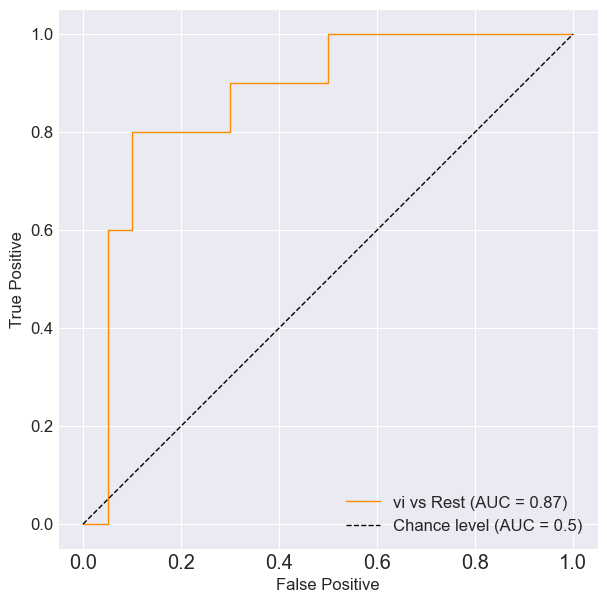

In [31]:
RocCurveDisplay.from_predictions(y_oh_test[:, class_id],
                                 y_score[:, class_id],
                                name=f'{class_names[class_of_interest]} vs Rest',
                                color = 'darkorange', plot_chance_level=True)

plt.axis('square')
plt.xlabel('False Positive')
plt.ylabel('True Positive')